In [0]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [0]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))

Now we're going to learn more about data and preprocess it

In [0]:
df.head()

RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]

In [0]:
X = df.iloc[:,3:13]
y = df.iloc[:,13].values
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(10000, 10)
(10000,)
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [0]:
cats = ['Geography','Gender']
X = pd.get_dummies(X,columns=cats,drop_first=True)

In [0]:
X 

CreditScore  Age  Tenure  ...  Geography_Germany  Geography_Spain  Gender_Male
0             619   42       2  ...                  0                0            0
1             608   41       1  ...                  0                1            0
2             502   42       8  ...                  0                0            0
3             699   39       1  ...                  0                0            0
4             850   43       2  ...                  0                1            0
5             645   44       8  ...                  0                1            1
6             822   50       7  ...                  0                0            1
7             376   29       4  ...                  1                0            0
8             501   44       4  ...                  0                0            1
9             684   27       2  ...                  0                0            1
10            528   31       6  ...                  0                0            1
11            497   24       3  ...                  0                1            1
12            476   34      10  ...                  0                0            0
13            549   25       5  ...                  0                0            0
14            635   35       7  ...                  0                1            0
15            616   45       3  ...                  1                0            1
16            653   58       1  ...                  1                0            1
17            549   24       9  ...                  0                1            0
18            587   45       6  ...                  0                1            1
19            726   24       6  ...                  0                0            0
20            732   41       8  ...                  0                0            1
21            636   32       8  ...                  0                1            0
22            510   38       4  ...                  0                1            0
23            669   46       3  ...                  0                0            1
24            846   38       5  ...                  0                0            0
25            577   25       3  ...                  0                0            1
26            756   36       2  ...                  1                0            1
27            571   44       9  ...                  0                0            1
28            574   43       3  ...                  1                0            0
29            411   29       0  ...                  0                0            1
...           ...  ...     ...  ...                ...              ...          ...
9970          518   42       7  ...                  0                0            1
9971          833   34       3  ...                  0                0            0
9972          758   26       4  ...                  0                0            1
9973          611   27       7  ...                  0                0            1
9974          583   33       7  ...                  0                0            1
9975          610   50       1  ...                  1                0            1
9976          637   33       7  ...                  0                0            0
9977          683   32       9  ...                  0                0            0
9978          774   40       9  ...                  0                0            1
9979          677   58       1  ...                  0                0            0
9980          741   35       6  ...                  0                1            1
9981          498   42       3  ...                  1                0            1
9982          655   46       7  ...                  1                0            0
9983          613   40       4  ...                  0                0            1
9984          602   35       7  ...                  1                0            1
9985       

In [0]:
X=X.values


# Part 2 : Seperating train and test

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Part 3 : Transforming the Data

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 4 : Building the Artificial Neural Network

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
classifier = Sequential()


W0822 15:05:03.648304 140666914035584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [0]:
classifier.add(Dense(units=6,activation='relu',kernel_initializer='uniform',input_dim=11))
classifier.add(Dense(units=6,activation='relu',kernel_initializer='uniform'))
classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

W0822 15:05:08.069560 140666914035584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0822 15:05:08.085743 140666914035584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

W0822 15:05:11.497318 140666914035584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0822 15:05:11.530846 140666914035584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0822 15:05:11.537668 140666914035584 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0822 15:05:11.771245 140666914035584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. P

Epoch 1/100
8000/8000 [==============================] - 2s 209us/step - loss: 0.4845 - acc: 0.7957
Epoch 2/100
8000/8000 [==============================] - 1s 119us/step - loss: 0.4288 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 113us/step - loss: 0.4229 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 113us/step - loss: 0.4186 - acc: 0.8201
Epoch 5/100
8000/8000 [==============================] - 1s 112us/step - loss: 0.4166 - acc: 0.8264
Epoch 6/100
8000/8000 [==============================] - 1s 117us/step - loss: 0.4141 - acc: 0.8275
Epoch 7/100
8000/8000 [==============================] - 1s 114us/step - loss: 0.4126 - acc: 0.8312
Epoch 8/100
8000/8000 [==============================] - 1s 116us/step - loss: 0.4114 - acc: 0.8305
Epoch 9/100
8000/8000 [==============================] - 1s 115us/step - loss: 0.4105 - acc: 0.8312
Epoch 10/100
8000/8000 [==============================] - 1s 113us/step - loss: 0.4091 - acc: 0.8344

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
y_pred


array([[0.29337794],
       [0.43792045],
       [0.2173056 ],
       ...,
       [0.32086846],
       [0.26766068],
       [0.15875146]], dtype=float32)

In [0]:
gone = np.count_nonzero(y)
print(gone)

2037


In [0]:
y_pred = (y_pred > 0.5)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [0]:
print(cm)

[[1493  102]
 [ 183  222]]


Text(0.5, 257.44, 'Predicted label')

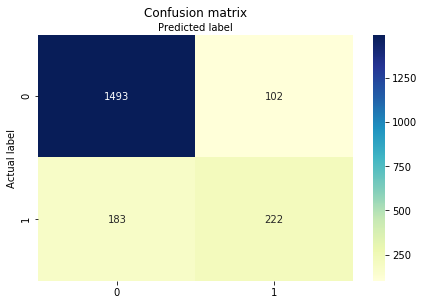

In [0]:

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
y_pred_proba = classifier.predict(X_test)
from sklearn.metrics import precision_recall_curve
from sklearn import metrics

(0, 1)

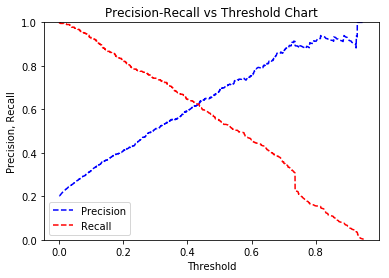

In [0]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba) 
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [0]:
print(pr_auc)

0.6860573951936332


# Making a Single Prediction

In [0]:
new_pred = classifier.predict(sc.transform(np.array([[600,40,3,60000,2,1,1,50000,0,0,1]])))
new_pred = (new_pred > 0.5)
print(new_pred)

[[False]]


# Evaluating ANN

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

defining our classifier function:


In [0]:
def build_classifier():
  classifier = Sequential()
  classifier.add(Dense(units=6,activation='relu',kernel_initializer='uniform',input_dim=11))
  classifier.add(Dense(units=6,activation='relu',kernel_initializer='uniform'))
  classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  
  return classifier
  

In [0]:
my_classifier = KerasClassifier(build_fn=build_classifier,batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator=my_classifier,X=X_train,y=y_train,
                            cv=10,n_jobs=-1)

In [0]:
print(accuracies)

[0.8425     0.84999999 0.8275     0.83       0.85374999 0.835
 0.835      0.83875    0.83749999 0.84624999]


In [0]:
mean = np.mean(accuracies)
variance = np.std(accuracies)
print(mean)
print(variance)

0.8396249952912331
0.00804382457274368


# Drop Out Regularization

as we saw from variance, we dont have an overfitting problem here
but sometimes the variance is much bigger than this and there is an overfitting problem. due to solving that problem we use drop out


In [0]:
from keras.layers import Dropout

In [0]:
classifier_d = Sequential() #with drop out
classifier_d.add(Dense(units=6,activation='relu',kernel_initializer='uniform',input_dim=11))
classifier_d.add(Dropout(rate=0.1))
classifier_d.add(Dense(units=6,activation='relu',kernel_initializer='uniform'))
classifier_d.add(Dropout(rate=0.1))
classifier_d.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))
classifier_d.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


  

W0822 15:24:28.571101 140666914035584 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
classifier_d.fit(X_train, y_train, batch_size = 10, epochs = 100)
y_pred_d = classifier_d.predict(X_test)
y_pred_d = (y_pred_d > 0.5)

Epoch 1/100
8000/8000 [==============================] - 1s 171us/step - loss: 0.4812 - acc: 0.7956
Epoch 2/100
8000/8000 [==============================] - 1s 128us/step - loss: 0.4235 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 124us/step - loss: 0.4111 - acc: 0.7999
Epoch 4/100
8000/8000 [==============================] - 1s 121us/step - loss: 0.4033 - acc: 0.8240
Epoch 5/100
8000/8000 [==============================] - 1s 123us/step - loss: 0.3988 - acc: 0.8417
Epoch 6/100
8000/8000 [==============================] - 1s 122us/step - loss: 0.3938 - acc: 0.8431
Epoch 7/100
8000/8000 [==============================] - 1s 123us/step - loss: 0.3879 - acc: 0.8477
Epoch 8/100
8000/8000 [==============================] - 1s 123us/step - loss: 0.3917 - acc: 0.8476
Epoch 9/100
8000/8000 [==============================] - 1s 124us/step - loss: 0.3856 - acc: 0.8500
Epoch 10/100
8000/8000 [==============================] - 1s 122us/step - loss: 0.3862 - acc: 0.8476

In [0]:
acc_d = metrics.accuracy_score(y_test,y_pred_d)
print(acc_d)

0.866


# Parameter Tuning

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def build_classifier(optimizer):
  classifier = Sequential()
  classifier.add(Dense(units=6,activation='relu',kernel_initializer='uniform',input_dim=11))
  classifier.add(Dense(units=6,activation='relu',kernel_initializer='uniform'))
  classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))
  classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
  
  return classifier

my_classifier_t = KerasClassifier(build_fn=build_classifier)
my_classifier = KerasClassifier(build_fn=build_classifier,batch_size = 10, epochs = 100)
parameters = {'batch_size' : [25,32],
             'epochs' : [100,500],
             'optimizer' : ['adam','rmsprop']}


In [43]:
grid_search = GridSearchCV(estimator=my_classifier_t,param_grid=parameters,
                          scoring = 'accuracy',cv=10)

grid_search = grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_

7200/7200 [==============================] - 1s 98us/step - loss: 0.3886 - acc: 0.8400
Epoch 477/500
7200/7200 [==============================] - 1s 99us/step - loss: 0.3890 - acc: 0.8400
Epoch 478/500
7200/7200 [==============================] - 1s 97us/step - loss: 0.3891 - acc: 0.8410
Epoch 479/500
7200/7200 [==============================] - 1s 95us/step - loss: 0.3888 - acc: 0.8397
Epoch 480/500
7200/7200 [==============================] - 1s 93us/step - loss: 0.3890 - acc: 0.8407
Epoch 481/500
7200/7200 [==============================] - 1s 94us/step - loss: 0.3889 - acc: 0.8411
Epoch 482/500
7200/7200 [==============================] - 1s 95us/step - loss: 0.3888 - acc: 0.8413
Epoch 483/500
7200/7200 [==============================] - 1s 97us/step - loss: 0.3886 - acc: 0.8410
Epoch 484/500
7200/7200 [==============================] - 1s 96us/step - loss: 0.3888 - acc: 0.8396
Epoch 485/500
7200/7200 [==============================] - 1s 98us/step - loss: 0.3888 - acc: 0.8407
Epoc

NameError: ignored

In [45]:
best_acc = grid_search.best_score_
print(best_acc)
print(best_params)

0.849375
{'batch_size': 32, 'epochs': 500, 'optimizer': 'rmsprop'}
